In [88]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data
dataObj = load_digits()
X = dataObj.data
y = dataObj.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.30, random_state=1
)

# Using pipeline
Use pipeline to simplify your machine learning. Try using the follow steps in the pipeline.
- Standardization
- PCA
- Support vector machine

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [90]:
pipe_svc = Pipeline(
    [
        ("scl", StandardScaler()),
        ("pca", PCA(n_components=10)),
        ("clf", SVC(random_state=1)),
    ]
)

# Training
pipe_svc.fit(X_train, y_train)

# Making prediction from testing data
y_pred = pipe_svc.predict(X_test)

# Training accuracy
training_accuracy = pipe_svc.score(X_train, y_train)
print(f"Training Accuracy:{training_accuracy:6.3f}")

# Testing accuracy
testing_accuracy = pipe_svc.score(X_test, y_test)
print(f"Testing Accuracy:{testing_accuracy:6.3f}")

Training Accuracy: 0.971
Testing Accuracy: 0.952


# Cross validation
Use 10 fold stratified cross-validation to calculate validation accuracy.

In [91]:
from sklearn.model_selection import cross_validate

In [92]:
scores = cross_validate(estimator=pipe_svc,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         scoring=['accuracy'],
                         n_jobs=-1)

print("\nCrossed-validation")  
for k, v in scores.items():
    arrayPrint =   ', '.join([f'{el:3.2f}' for el in v])
    print(f"{k:15s}:", arrayPrint)

print("\nCrossed-validation accuracy")  
print(f"Mean:{np.mean(scores['test_accuracy']):6.3f}")
print(f"Std:{np.std(scores['test_accuracy']):6.3f}")


Crossed-validation
fit_time       : 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.03, 0.04, 0.03, 0.04
score_time     : 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01
test_accuracy  : 0.88, 0.96, 0.94, 0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.94

Crossed-validation accuracy
Mean: 0.942
Std: 0.022


# Learning curve
Find out how much samples (in fraction) do we need.

In [93]:
from sklearn.model_selection import learning_curve

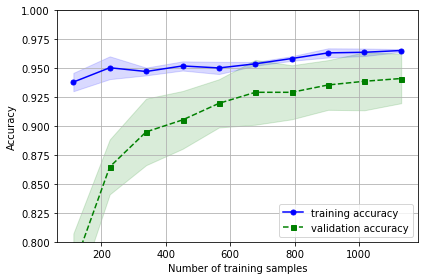

In [94]:
train_size = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, val_scores =\
                learning_curve(estimator=pipe_svc,
                               X=X_train,
                               y=y_train,
                               train_sizes=train_size,
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

# Validation curve
Find out what is a good value of `C`.

In [95]:
from sklearn.model_selection import validation_curve

Text(0.5, 0, 'Parameter C')

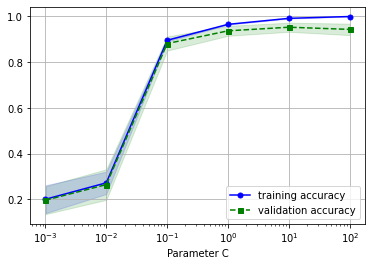

In [96]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, val_scores = validation_curve(
                estimator=pipe_svc, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_range, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(param_range,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')

# Grid Search CV
Find out the best hyperparameters.

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

set1 = {'clf__C': param_range,
        'clf__kernel': ['linear']}

set2 = {'clf__C': param_range,
        'clf__gamma': param_range,
        'clf__kernel': ['rbf']}

param_grid = [set1, set2]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)

gs.fit(X_train,y_train)

df = pd.DataFrame(gs.cv_results_)
df = df.sort_values(by=['rank_test_score'])
display(df.head(5))
print(gs.best_score_)
print(gs.best_params_)
gs.refit
clf = gs.best_estimator_
testing_accuracy = clf.score(X_test,y_test)
print(f"Testing accuracy: {testing_accuracy:6.3f}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__kernel,param_clf__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.032000,0.000894,0.015800,0.000749,10.0,rbf,0.01,"{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__ker...",0.944444,0.952381,0.952191,0.956175,0.940239,0.949086,0.005841,1
58,0.032399,0.001855,0.014821,0.002210,100.0,rbf,0.01,"{'clf__C': 100.0, 'clf__gamma': 0.01, 'clf__ke...",0.940476,0.952381,0.948207,0.976096,0.920319,0.947496,0.018057,2
43,0.078873,0.012903,0.023217,0.000843,1.0,rbf,0.1,"{'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kerne...",0.900794,0.928571,0.948207,0.960159,0.956175,0.938781,0.021889,3
59,0.073112,0.006178,0.023593,0.003011,100.0,rbf,0.1,"{'clf__C': 100.0, 'clf__gamma': 0.1, 'clf__ker...",0.904762,0.936508,0.948207,0.964143,0.940239,0.938772,0.019477,4
51,0.066747,0.002736,0.023577,0.001012,10.0,rbf,0.1,"{'clf__C': 10.0, 'clf__gamma': 0.1, 'clf__kern...",0.900794,0.936508,0.944223,0.964143,0.936255,0.936385,0.020488,5


0.9490861949029281
{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
Testing accuracy:  0.954


# Randomized Search CV
Find out the "best" hyperparameter you can in a limited time.

In [99]:
from sklearn.model_selection import RandomizedSearchCV


In [100]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

set1 = {'clf__C': param_range,
        'clf__kernel': ['linear']}

set2 = {'clf__C': param_range,
        'clf__gamma': param_range,
        'clf__kernel': ['rbf']}

param_grid = [set1, set2]

rs = RandomizedSearchCV(estimator=pipe_svc, 
                  param_distributions=param_grid, 
                  n_iter = 10,
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)

rs.fit(X_train,y_train)

df = pd.DataFrame(rs.cv_results_)
df = df.sort_values(by=['rank_test_score'])
display(df.head(5))
print(rs.best_score_)
print(rs.best_params_)
rs.refit
clf = rs.best_estimator_
testing_accuracy = clf.score(X_test,y_test)
print(f"Testing accuracy: {testing_accuracy:6.3f}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__kernel,param_clf__C,param_clf__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.030994,0.001792,0.018200,0.004915,rbf,10.0,0.01,"{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'cl...",0.944444,0.952381,0.952191,0.956175,0.928287,0.946696,0.009963,1
0,0.064802,0.009704,0.004000,0.000001,linear,10.0,NaN,"{'clf__kernel': 'linear', 'clf__C': 10.0}",0.880952,0.912698,0.888446,0.932271,0.880478,0.898969,0.020370,2
1,0.045601,0.009394,0.028601,0.011410,rbf,10.0,0.001,"{'clf__kernel': 'rbf', 'clf__gamma': 0.001, 'c...",0.880952,0.892857,0.904382,0.908367,0.900398,0.897391,0.009687,3
3,0.130798,0.009154,0.038396,0.000485,rbf,0.1,1.0,"{'clf__kernel': 'rbf', 'clf__gamma': 1.0, 'clf...",0.210317,0.119048,0.099602,0.099602,0.175299,0.140773,0.044476,4
2,0.289472,0.011464,0.056402,0.001020,rbf,100.0,1000.0,"{'clf__kernel': 'rbf', 'clf__gamma': 1000.0, '...",0.111111,0.111111,0.099602,0.099602,0.123506,0.108986,0.008899,5


0.946695756655916
{'clf__kernel': 'rbf', 'clf__gamma': 0.01, 'clf__C': 10.0}
Testing accuracy:  0.954
